# Machine Dylan

Based on: https://github.com/keras-team/keras/blob/master/examples/lstm_text_generation.py

## Setup

In [1]:
import json
import random
import sys
import string

import numpy as np
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
# load data
with open("../data/songs.json") as f:
    songs = json.load(f)

# combine lyrics into single string
text = ''.join(s['lyrics'] for s in songs)

# cleanup text
text = text.lower()
remove = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\u2028\r‘“”'
text = text.translate(str.maketrans('', '', remove))

print('corpus length:', len(text))

corpus length: 645490


In [3]:
chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars: 47


In [4]:
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

nb sequences: 215150


## Create model

In [5]:
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Vectorization...


In [6]:
# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model...


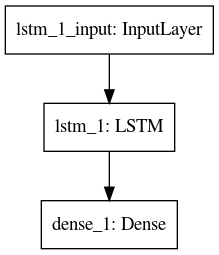

In [7]:
plot_model(model)

## Train Model

In [8]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
model.fit(
    x,
    y,
    batch_size=128,
    epochs=60,
    callbacks=[print_callback]
)

In [ ]:
# Save the model
model.save('model1.h5')

## Testing

In [11]:
import keras

# Recreate the exact same model purely from the file
model = keras.models.load_model('../models/machine_dylan.h5')

In [12]:
start_index = random.randint(0, len(text) - maxlen - 1)
for diversity in [0.2, 0.5, 1.0, 1.2]:
    print('----- diversity:', diversity)

    generated = ''
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)

    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = indices_char[next_index]

        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()

----- diversity: 0.2
----- Generating with seed: "fan
doin’ business with a tiny man who s"
fan
doin’ business with a tiny man who speak to me

i was a friend off a street

well i was a poor boy bound to the morning of the sun
you can say it all the cards of the star
i’m gonna get you wonder me be
and i cant stop in the street
and i was a song of the world

well i was a song of the world

well i cant stand it all the bells of my suffer
when the change i was a party

i would not say it ain’t no pain
and the world is all of the ----- diversity: 0.5
----- Generating with seed: "fan
doin’ business with a tiny man who s"
fan
doin’ business with a tiny man who speak
i been the street
the backs of her back and more on the highways and the off
and the well she wants me a roll of the stanight part
where the landlong i’ve gone

now they take the sun and the were wallfresses
from the judge will start a hold of the rain
and we were
as a long that woman there ain’t a confinerencelly hand

well i sa

/home/dustin/miniconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


the line
fine 
draw the door he’s now
all of you face bets him blame
you stare a membody seein their powers deep
int been satpact ’rtust and in mind

we tell her let the maga black job if corner
with my louise up the ride
why wont we love you wonta surgan
hylheams too his folly wasn’t day
----- diversity: 1.2
----- Generating with seed: "fan
doin’ business with a tiny man who s"
fan
doin’ business with a tiny man who solits peopl
bed looking up erpence to mewell still just mike i got to tauk you walk a all of roke open dock
surrast’s guas from my
hesed name with orrup

kings and it’s understand my foot
and mropd’d lie in liot 
well i’m laite right after ’e 
hey babe we never get you you cant get you but gliennt voicans
putte’rness have wro
you go to ifavring folences inscentone
and thenties belown
just mapitu w